In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import shapely

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
shp_file = gpd.read_file(r'./输入数据/矢量样本数据/SENLIN.shp')#读取shp文件

In [4]:
shp_file.head()#查看shp文件

,Id,class,geometry
0,0,5,"POLYGON ((674331.228 3428475.071, 674404.041 3..."
1,0,5,"POLYGON ((674524.268 3428465.757, 674658.042 3..."
2,0,5,"POLYGON ((674751.175 3427847.689, 674927.282 3..."
3,0,5,"POLYGON ((674866.830 3428952.761, 675009.071 3..."
4,0,5,"POLYGON ((673140.050 3429268.992, 673224.717 3..."


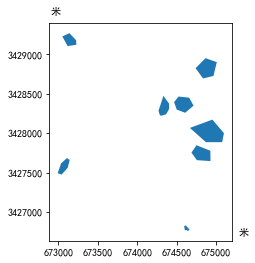

In [5]:
fig,ax = plt.subplots()
ax.ticklabel_format(useOffset = False)
# ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
shp_file.plot(ax=ax)
plt.text(x = 672900,y=3429500,s='米')
plt.text(x = 675280,y=3426700,s='米')

In [6]:
shp_file.crs#查看shp文件投影信息

<Projected CRS: EPSG:32649>
Name: WGS 84 / UTM zone 49N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°E and 114°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Hong Kong. Indonesia. Macao. Malaysia - East Malaysia - Sarawak. Mongolia. Russian Federation. Vietnam.
- bounds: (108.0, 0.0, 114.0, 84.0)
Coordinate Operation:
- name: UTM zone 49N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
shp_file.to_crs("EPSG:32633")#修改shp文件投影信息

,Id,class,geometry
0,0,5,"POLYGON ((8486482.760 11412644.681, 8486631.15..."
1,0,5,"POLYGON ((8486412.849 11413001.954, 8486378.91..."
2,0,5,"POLYGON ((8487441.133 11413695.469, 8487488.75..."
3,0,5,"POLYGON ((8485367.869 11413409.083, 8485396.68..."
4,0,5,"POLYGON ((8485566.720 11410108.706, 8485691.24..."
5,0,5,"POLYGON ((8488477.314 11410762.874, 8488508.54..."
6,0,5,"POLYGON ((8489362.812 11413904.086, 8489438.36..."
7,0,5,"POLYGON ((8486755.334 11413918.645, 8487003.09..."


In [8]:
shp_file.crs

<Projected CRS: EPSG:32649>
Name: WGS 84 / UTM zone 49N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°E and 114°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Hong Kong. Indonesia. Macao. Malaysia - East Malaysia - Sarawak. Mongolia. Russian Federation. Vietnam.
- bounds: (108.0, 0.0, 114.0, 84.0)
Coordinate Operation:
- name: UTM zone 49N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
g1 = shp_file.buffer(0.5,resolution = 16)

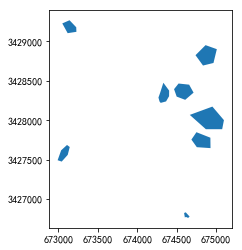

In [10]:
g1.plot()

In [11]:
mid_point = shp_file.centroid#查看每个面的中心点
mid_point

0    POINT (674339.068 3428330.892)
1    POINT (674585.822 3428369.220)
2    POINT (674816.671 3427737.890)
3    POINT (674882.675 3428823.444)
4    POINT (673143.032 3429182.746)
5    POINT (673068.698 3427578.404)
6    POINT (674624.299 3426793.403)
7    POINT (674911.936 3428016.326)
dtype: geometry

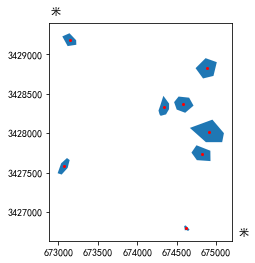

In [12]:
# ax1 = shp_file.plot()
# ax2 = mid_point.plot(ax = ax1,color = 'r',markersize = 4.0)
fig,ax = plt.subplots()
ax.ticklabel_format(useOffset = False)
# ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax1 = shp_file.plot(ax=ax)
ax2 = mid_point.plot(ax = ax1,color = 'r',markersize = 4.0)
plt.text(x = 672900,y=3429500,s='米')
plt.text(x = 675280,y=3426700,s='米')

In [13]:
g3 = shp_file.boundary#降维

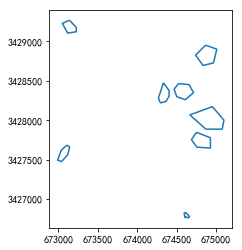

In [14]:
g3.plot()

In [15]:
g4 = shp_file.convex_hull

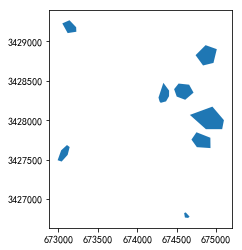

In [16]:
g4.plot()

In [17]:
shp_file.area

0    21280.687722
1    34218.706431
2    34003.293813
3    44261.020422
4    18046.631075
5    16140.265255
6     2632.263329
7    76240.071834
dtype: float64

In [18]:
g2 = shp_file.buffer(30,resolution=16)

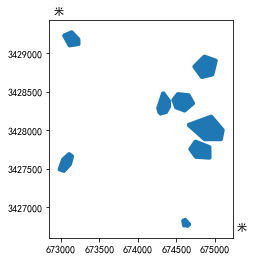

In [19]:
# ax = g2.plot()
# ax.axis('off')
fig,ax = plt.subplots()
ax.ticklabel_format(useOffset = False)
# ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
ax1 = g2.plot(ax=ax)
plt.text(x = 672900,y=3429500,s='米')
plt.text(x = 675280,y=3426700,s='米')

In [20]:
g2.area

0     42421.597133
1     57879.765552
2     58549.330535
3     71302.410483
4     36800.467612
5     35325.231473
6     12065.455256
7    112797.868530
dtype: float64

In [21]:
shp_file.length

0     610.603061
1     694.605684
2     724.104931
3     807.288199
4     531.036567
5     545.402474
6     221.856301
7    1124.501779
dtype: float64

(-1.55, 10.55, -0.5, 10.5)

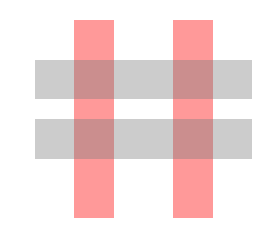

In [22]:
polygon1 = gpd.GeoDataFrame({
    'value1': [1, 2],
    'geometry': [shapely.geometry.Polygon([(1, 0), (3, 0), (3, 10), (1, 10)]),
                 shapely.geometry.Polygon([(6, 0), (8, 0), (8, 10), (6, 10)])]
})

polygon2 = gpd.GeoDataFrame({
    'value2': [3, 4],
    'geometry': [shapely.geometry.Polygon([(-1, 3), (-1, 5), (10, 5), (10, 3)]),
                 shapely.geometry.Polygon([(-1, 6), (-1, 8), (10, 8), (10, 6)])]
})

ax = polygon1.plot(color='red', alpha=0.4)
ax = polygon2.plot(color='grey', alpha=0.4, ax=ax)
ax.axis('off')

(0.6499999999999999, 8.35, 2.7499999999999996, 8.25)

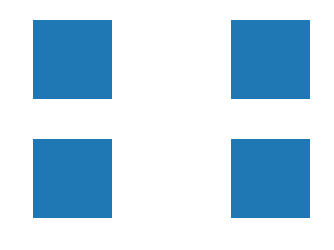

In [23]:
g5 = gpd.overlay(polygon1,polygon2,how='intersection')
ax = g5.plot()
ax.axis('off')

(-1.5499999999999998, 10.549999999999999, -0.5, 10.5)

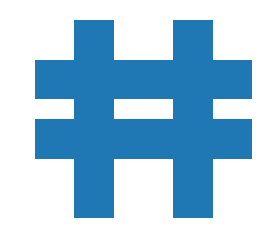

In [24]:
g6 = gpd.overlay(polygon1,polygon2,how='union')
ax = g6.plot()
ax.axis('off')

(-1.5499999999999998, 10.549999999999999, -0.5, 10.5)

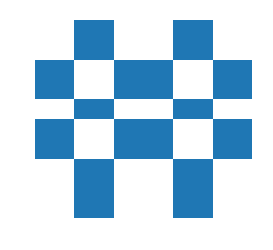

In [25]:
g7 = gpd.overlay(polygon1,polygon2,how='symmetric_difference')
ax = g7.plot()
ax.axis('off')

(0.6499999999999999, 8.35, -0.5, 10.5)

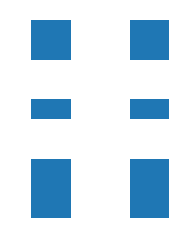

In [26]:
g8 = gpd.overlay(polygon1,polygon2,how='difference')
ax = g8.plot()
ax.axis('off')

(0.6499999999999999, 8.35, -0.5, 10.5)

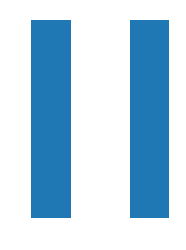

In [27]:
g9 = gpd.overlay(polygon1,polygon2,how='identity')
ax = g9.plot()
ax.axis('off')

In [28]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [29]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [30]:
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'country'})

In [31]:
countries.head()

,geometry,country
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


In [32]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [33]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", op='intersects')

In [34]:
cities_with_country.head()

,name,geometry,index_right,country
0,Vatican City,POINT (12.45339 41.90328),141,Italy
1,San Marino,POINT (12.44177 43.93610),141,Italy
192,Rome,POINT (12.48131 41.89790),141,Italy
2,Vaduz,POINT (9.51667 47.13372),114,Austria
184,Vienna,POINT (16.36469 48.20196),114,Austria
